In [1]:
# import requests library to make API calls 
import requests
import matplotlib.pyplot as plt
# import pandas 
import pandas as pd
import json
!pip install pandas-profiling
import pandas_profiling as pp;
import numpy as np;

In [2]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

keys = get_keys("/Users/alyssaliguori/secret/alpha_vantage_api.json")
api_key = keys['api_key']

In [3]:
# define a function to call Alpha Vantage API
def call_alphavantage(etf): 
    URL = 'https://www.alphavantage.co/query?'
    PARAMS = {'function': 'TIME_SERIES_DAILY', 
              'symbol': etf, 
              'apikey': api_key,
              'outputsize': 'full'
             }
    response = requests.get(URL, params=PARAMS)
    print('status code:', response.status_code)
    df = pd.DataFrame(response.json()['Time Series (Daily)'])
    return df

In [4]:
# define a function that renames columns after calling the API and formatting as a df 
def call_api_and_rename(etf):
    df = call_alphavantage(etf)        
    df = df.T
    df.columns = ['open_{}'.format(etf), 
                  'high_{}'.format(etf),
                  'low_{}'.format(etf),
                  'close_{}'.format(etf),
                  'volume_{}'.format(etf)] 
    return df

In [5]:
# call function and set resulting df equal to variable 
df_gld = call_api_and_rename('GLD') # gold bullion
df_gdx = call_api_and_rename('GDX') # gold mining
df_slv = call_api_and_rename('SLV') # silver bullion
df_sil = call_api_and_rename('SIL') # silver mining
df_index = call_api_and_rename('DJI') # Dow Jones Industrial Average 

status code: 200
status code: 200
status code: 200
status code: 200
status code: 200


In [6]:
df_gld.shape, df_gdx.shape, df_slv.shape, df_sil.shape, df_index.shape

((3745, 5), (3367, 5), (3383, 5), (2383, 5), (4971, 5))

In [7]:
df_gdx.T.describe()

,2019-10-04,2019-10-03,2019-10-02,2019-10-01,2019-09-30,2019-09-27,2019-09-26,2019-09-25,2019-09-24,2019-09-23,...,2006-06-05,2006-06-02,2006-06-01,2006-05-31,2006-05-30,2006-05-26,2006-05-25,2006-05-24,2006-05-23,2006-05-22
count,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
unique,5,5,5,5,5,5,5,5,5,4,...,4,5,5,5,5,4,4,5,4,5
top,27.1500,27.2400,27.4700,27.4700,73206900,27.5000,45715000,28.4300,28.6900,29.1600,...,40.2700,277300,38.5300,38.8500,38.1100,38.7400,38.3200,638600,37.7500,197100
freq,1,1,1,1,1,1,1,1,1,2,...,2,1,1,1,1,2,2,1,2,1


In [8]:
# join all five pandas dataframes together 
df_index_gld = df_index.join(df_gld, how='left')
df_index_gld_slv = df_index_gld.join(df_slv, how='left')
df_index_gld_slv_gdx = df_index_gld_slv.join(df_gdx, how='left')
df_etfs = df_index_gld_slv_gdx.join(df_sil, how='left')
len(df_etfs)

4971

In [9]:
# view records for combined df 
df_etfs.head()

,open_DJI,high_DJI,low_DJI,close_DJI,volume_DJI,open_GLD,high_GLD,low_GLD,close_GLD,volume_GLD,...,open_GDX,high_GDX,low_GDX,close_GDX,volume_GDX,open_SIL,high_SIL,low_SIL,close_SIL,volume_SIL
2019-10-04,26271.6992,26590.7402,26271.6992,26573.7207,224487374,141.4800,142.3100,141.1400,141.9000,9652594,...,27.1500,27.9100,27.1400,27.8700,48876566,28.2900,28.9123,28.1154,28.8700,157979
2019-10-03,26039.0195,26205.1992,25743.4609,26201.0391,241610000,141.3600,143.2500,141.2900,141.9000,12396100,...,27.4100,28.0500,27.2400,27.2500,63344000,28.3900,29.0000,28.3000,28.3100,177600
2019-10-02,26425.8594,26438.0391,25974.1191,26078.6191,309640000,140.7900,141.8800,140.4600,141.2600,11914300,...,27.4700,27.5000,27.0200,27.4100,65837200,28.5800,28.6000,28.1400,28.4100,160000
2019-10-01,26962.5391,27046.2109,26562.2207,26573.0391,260110000,138.0700,140.1900,137.8000,139.6300,12476200,...,26.6200,27.4700,26.5100,26.9200,68625600,27.9500,28.6400,27.8500,28.2200,160400
2019-09-30,26852.3301,26998.8594,26852.3301,26916.8301,222680000,139.7700,140.2100,138.0300,138.8700,15459100,...,26.9900,27.3500,26.5400,26.7100,73206900,28.5600,28.9000,27.9200,28.1100,357600


In [20]:
# convert index to datetime data type
df_etfs.index = pd.to_datetime(df_etfs.index)
type(df_etfs.index)

# convert indicator columns to integers
df_etfs = df_etfs.apply(pd.to_numeric)

# add column called 'date' that's a copy of index 
df_etfs['date'] = df_etfs.index

In [12]:
pp.ProfileReport(df_gdx);

In [81]:
#indicators = ['open', 'close', 'high', 'low', 'volume']
# initialize lists to correspond to each of the financial indicators

def add_cols_to_list(indicator):
    result = []
    for column in df_etfs.columns:
        if column.endswith('DJI'):
             continue
        elif column.startswith(indicator): 
            result.append(column)
    return result

# call function to add all columns to list except DJI for each indicator
open_list = add_cols_to_list('open')
close_list = add_cols_to_list('close')
high_list = add_cols_to_list('high')
low_list = add_cols_to_list('low')
volume_list = add_cols_to_list('volume')
dji_list = ['open_DJI', 'close_DJI', 'high_DJI', 'low_DJI']

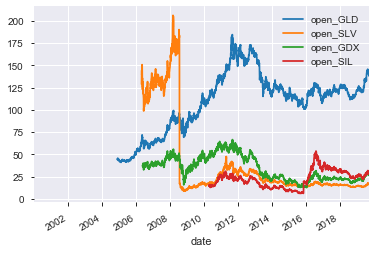

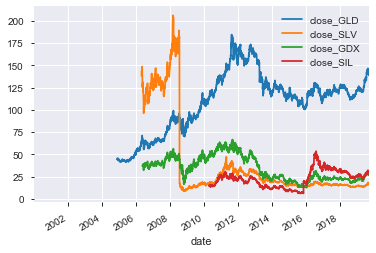

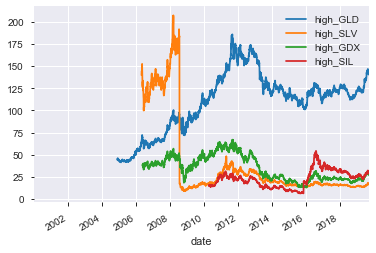

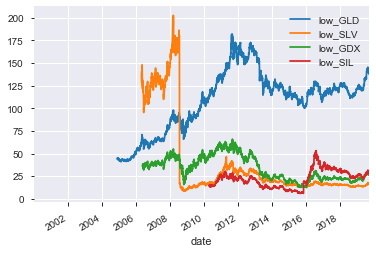

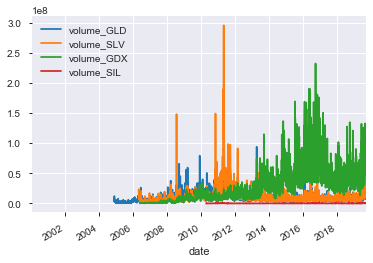

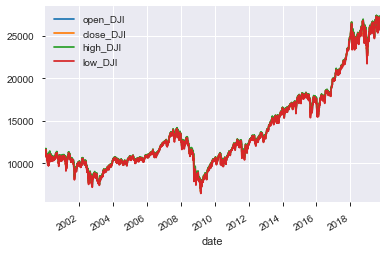

In [82]:
# plot opening prices for each ticker 
df_etfs.plot(kind='line', x='date', y=open_list)
df_etfs.plot(kind='line', x='date', y=close_list)
df_etfs.plot(kind='line', x='date', y=high_list)
df_etfs.plot(kind='line', x='date', y=low_list)
df_etfs.plot(kind='line', x='date', y=volume_list)
df_etfs.plot(kind='line', x='date', y=dji_list)

plt.show()

In [ ]:
def func(ticker):
    ticker+'_high' = 1+2

gld_high
sil_high


